In [1]:
!pip install matplotlib

In [2]:
!pip install numpy

In [3]:
!pip install opencv-python

In [4]:
!pip install tensorflow

In [5]:
!pip install seaborn

In [6]:
!pip install ipywidgets


In [7]:
!pip install scikit-learn

In [3]:
import tensorflow as tf
import numpy as np
import cv2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0  # Normalize

In [5]:
# Model Training
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model
class StopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy!")
            self.model.stop_training = True

try:  
    model = tf.keras.models.load_model('mnist_model.h5')
    print("Loaded pretrained model")
except:
    model = create_model()
    history = model.fit(x_train, y_train, epochs=9,
                       validation_data=(x_test, y_test),
                       callbacks=[StopCallback()])
    model.save('mnist_model.h5')
     
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Evolution')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Evolution')
    plt.legend()
    plt.show()


Loaded pretrained model


In [6]:

# Cell 4: Evaluation Metrics
y_pred = np.argmax(model.predict(x_test), axis=1)
report = classification_report(y_test, y_pred, output_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


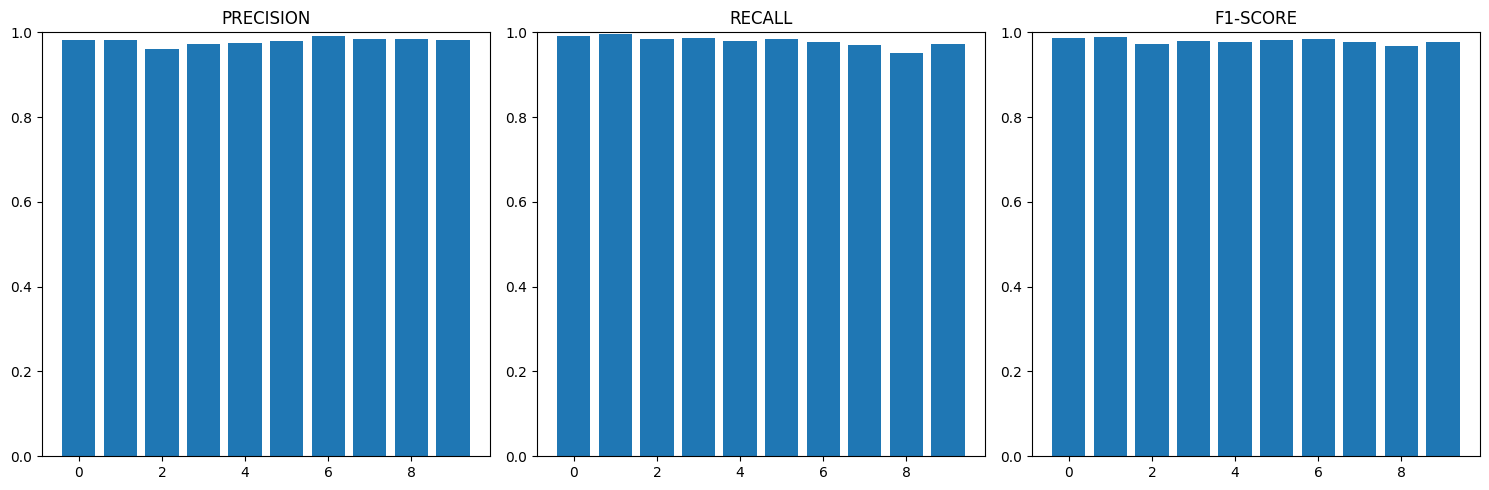

In [7]:
# Precision, Recall, F1 Visualization
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    values = [report[str(d)][metric] for d in range(10)]
    plt.bar(range(10), values)
    plt.title(metric.upper())
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


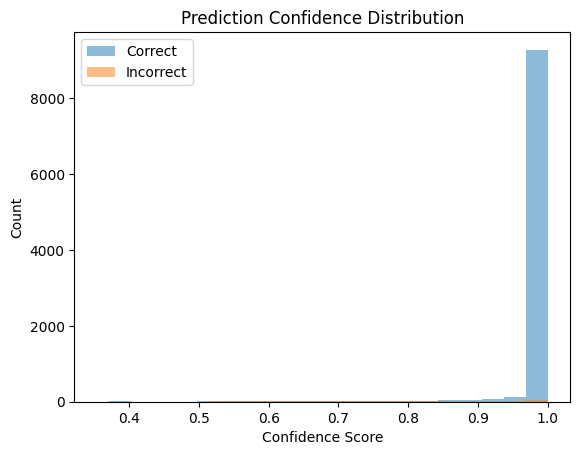

In [8]:
# Confidence Distribution
confidences = np.max(model.predict(x_test), axis=1)
correct = y_pred == y_test

plt.hist(confidences[correct], bins=20, alpha=0.5, label='Correct')
plt.hist(confidences[~correct], bins=20, alpha=0.5, label='Incorrect')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Prediction Confidence Distribution')
plt.legend()
plt.show()

In [13]:
sample = x_test[0]  # MNIST test image
pred = model.predict(sample[np.newaxis, ...])
print("Prediction:", np.argmax(pred), "Confidence:", np.max(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Prediction: 7 Confidence: 0.99999714


In [ ]:
# ... (Previous imports and model loading)

# Webcam setup
cap = cv2.VideoCapture(0)
cv2.namedWindow('MNIST Webcam')
cv2.setMouseCallback('MNIST Webcam', mouse_callback)
cv2.createTrackbar('Threshold', 'MNIST Webcam', 100, 255, lambda x: None)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        break
    
    threshold = cv2.getTrackbarPos('Threshold', 'MNIST Webcam')
    
    if start_inference:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
        
        h, w = frame.shape[:2]
        roi = thresh[h//2-75:h//2+75, w//2-75:w//2+75]
        
        # Debug: Show ROI
        cv2.imshow("ROI Preview", roi)
        
        roi_processed = cv2.resize(roi, (28, 28)).astype('float32') / 255.0
        pred = model.predict(roi_processed[np.newaxis, ...])
        digit = np.argmax(pred)
        confidence = np.max(pred)
        
        # Draw prediction (white text on black background)
        cv2.rectangle(frame, (w//2-80, h//2-80), (w//2+80, h//2+80), (0, 255, 0), 2)
        cv2.putText(frame, f"Pred: {digit} ({confidence:.2f})", 
                   (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    cv2.imshow('MNIST Webcam', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━